## EDA



label 分佈

         Count  Percentage
0  11842487079   99.147836
1     81715039    0.684136
2     20069754    0.168028


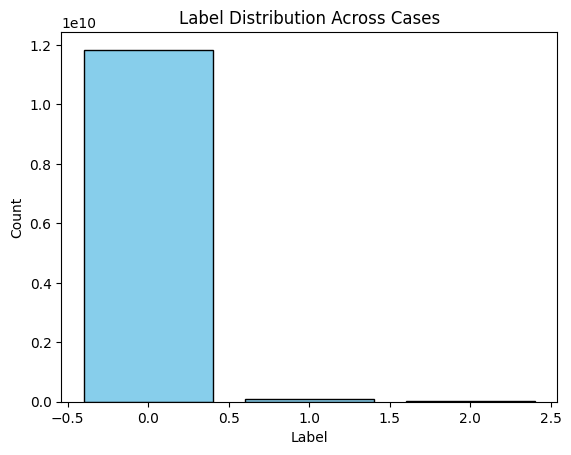

標籤分佈的標準差: 5558668011.158275
         Count  Percentage
0  11842487079   99.147836
1     81715039    0.684136
2     20069754    0.168028


In [35]:
import nibabel as nib
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

# 假設你有一個 cases 的路徑列表
tumor_volumes = []
label_counts = {0: 0, 1: 0, 2: 0}  # 用來儲存標籤的計數
data_path = "data/"
case_count = 210  # 假設有210個病例

for i in range(case_count):
    case_id = f"case_{i:05d}"
    case_path = os.path.join(data_path, case_id, "segmentation.nii.gz")  # 假設影像檔名為 segmentation.nii.gz
    
    if not os.path.exists(case_path):
        continue

    # 讀取分割影像並獲取資料
    segmentation = nib.load(case_path)
    seg_data = segmentation.get_fdata()

    # 計算每個標籤（0: 背景, 1: 腎臟, 2: 腫瘤）出現的次數
    for label in np.unique(seg_data):
        label_counts[label] += np.sum(seg_data == label)

    # 計算腫瘤體素數量 (標籤2)
    tumor_voxels = np.sum(seg_data == 2)



# 計算標籤的分佈
label_distribution = pd.DataFrame.from_dict(label_counts, orient='index', columns=['Count'])
label_distribution['Percentage'] = (label_distribution['Count'] / label_distribution['Count'].sum()) * 100

# 顯示標籤分佈的情況
print(label_distribution)

# 繪製標籤分佈的條形圖
plt.bar(label_distribution.index, label_distribution['Count'], color='skyblue', edgecolor='black')
plt.title("Label Distribution Across Cases")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# 計算標籤分佈的標準差
label_std = np.std(list(label_counts.values()))
print(f"標籤分佈的標準差: {label_std}")
print(label_distribution)

kidney + tumor 大小

In [33]:
import nibabel as nib
import numpy as np
import os
import pandas as pd

# 初始化變數
tumor_volumes = []
data_path = "data/"
case_count = 210

# 遍歷每個病例
for i in range(case_count):
    case_id = f"case_{i:05d}"
    case_path = os.path.join(data_path, case_id, "segmentation.nii.gz")
    
    # 檢查檔案是否存在
    if not os.path.exists(case_path):
        print(f"{case_id} not found.")
        continue

    # 讀取 segmentation 文件
    segmentation = nib.load(case_path)
    seg_data = segmentation.get_fdata()
    voxel_spacing = segmentation.header.get_zooms()  # mm

    # 計算每個體素的實際空間大小
    voxel_volume = voxel_spacing[0] * voxel_spacing[1] * voxel_spacing[2]

    # 計算 Kidney + Tumor 的體素數量
    kidney_voxels = np.sum(seg_data == 1)
    tumor_voxels = np.sum(seg_data == 2)
    total_voxels = kidney_voxels + tumor_voxels

    # 將體素數量轉換為實際體積（mm³）
    total_volume_mm3 = total_voxels * voxel_volume
    total_volume_cm3 = total_volume_mm3 / 1000  # 轉換為 cm³

    # 儲存結果
    tumor_volumes.append({'Case ID': case_id, 'Total Volume (cm³)': total_volume_cm3})

    # 印出當前病例結果
    # print(f"{case_id}: Total Volume (cm³) = {total_volume_cm3:.2f}")

# 將結果轉成 DataFrame
tumor_df = pd.DataFrame(tumor_volumes)

# 查看總結
print("\nOverall Statistics:")
print(tumor_df.describe())

# 存成檔案
tumor_df.to_csv("kidney_tumor_volumes.csv", index=False)





Overall Statistics:
       Total Volume (cm³)
count          210.000000
mean           540.709293
std            266.828451
min            192.493086
25%            382.649487
50%            470.714714
75%            581.073201
max           1962.359450


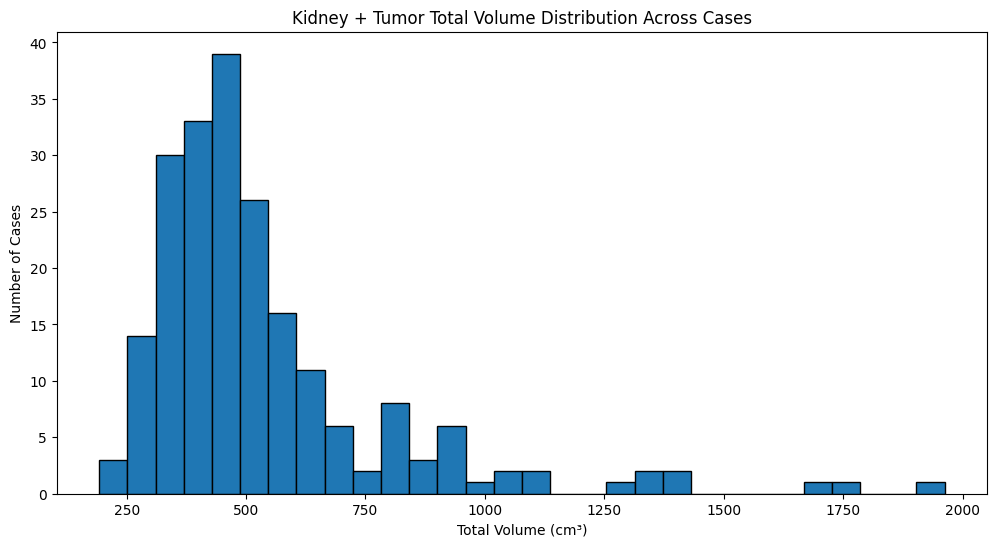

In [32]:
import matplotlib.pyplot as plt
# 畫直方圖
plt.figure(figsize=(12, 6))  # 設定圖表尺寸
plt.hist(tumor_df['Total Volume (cm³)'], bins=30, edgecolor='black')  # bins 可調整以控制直方圖的分隔

# 設定標題和軸標籤
plt.title("Kidney + Tumor Total Volume Distribution Across Cases")
plt.xlabel("Total Volume (cm³)")
plt.ylabel("Number of Cases")

# 顯示圖表
plt.show()

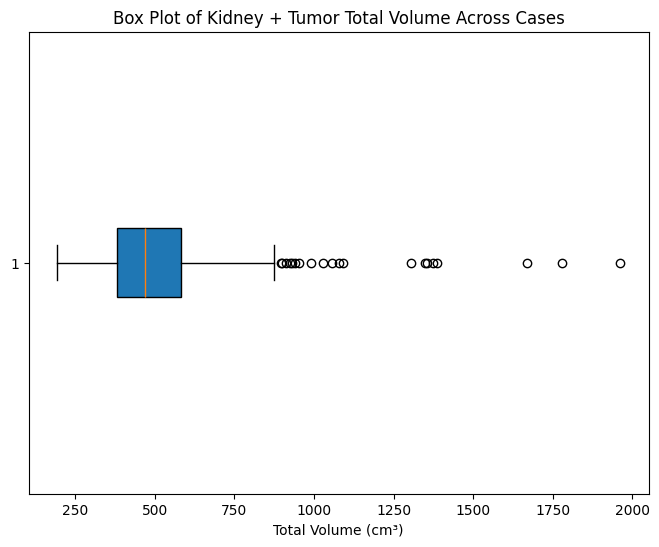

In [34]:
import matplotlib.pyplot as plt

# 畫箱型圖
plt.figure(figsize=(8, 6))  # 設定圖表尺寸
plt.boxplot(tumor_df['Total Volume (cm³)'], vert=False, patch_artist=True)

# 設定標題和軸標籤
plt.title("Box Plot of Kidney + Tumor Total Volume Across Cases")
plt.xlabel("Total Volume (cm³)")

# 顯示圖表
plt.show()

人口統計

      case_id  age_at_nephrectomy  gender  body_mass_index  \
0  case_00000                  49    male            29.47   
1  case_00001                  50    male            33.71   
2  case_00002                  74    male            28.13   
3  case_00003                  44  female            38.69   
4  case_00004                  73    male            28.59   

                                       comorbidities  smoking_history  \
0  {'myocardial_infarction': False, 'congestive_h...     never_smoked   
1  {'myocardial_infarction': False, 'congestive_h...  previous_smoker   
2  {'myocardial_infarction': False, 'congestive_h...   current_smoker   
3  {'myocardial_infarction': False, 'congestive_h...  previous_smoker   
4  {'myocardial_infarction': False, 'congestive_h...  previous_smoker   

  age_when_quit_smoking pack_years       chewing_tobacco_use  \
0        not_applicable          0  never_or_not_in_last_3mo   
1                    33          7  never_or_not_in_last_3mo

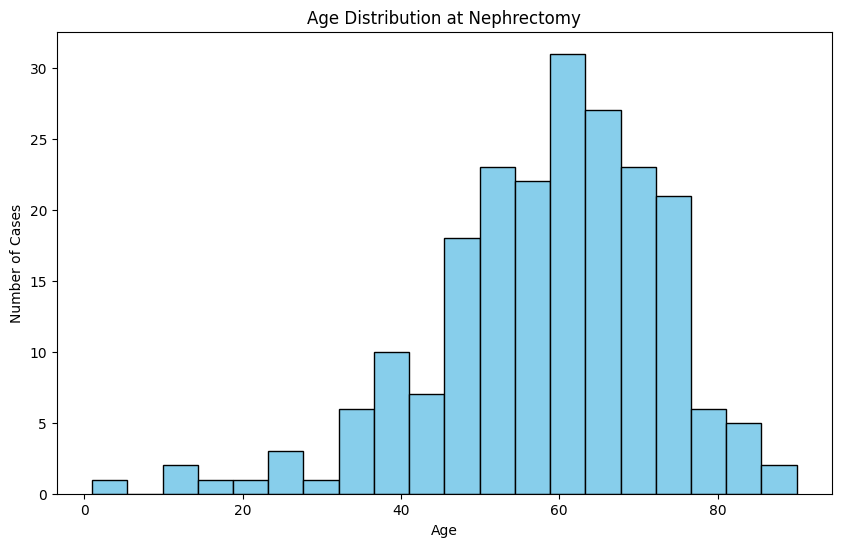

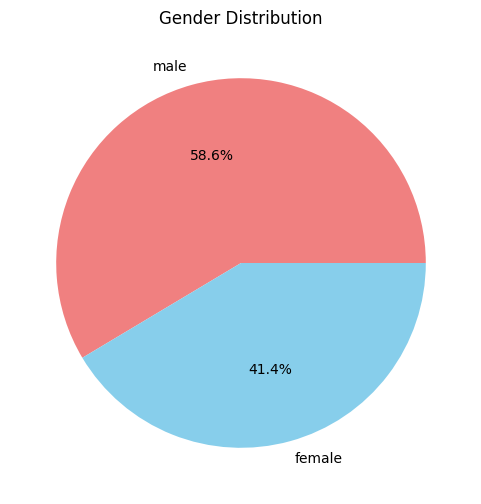

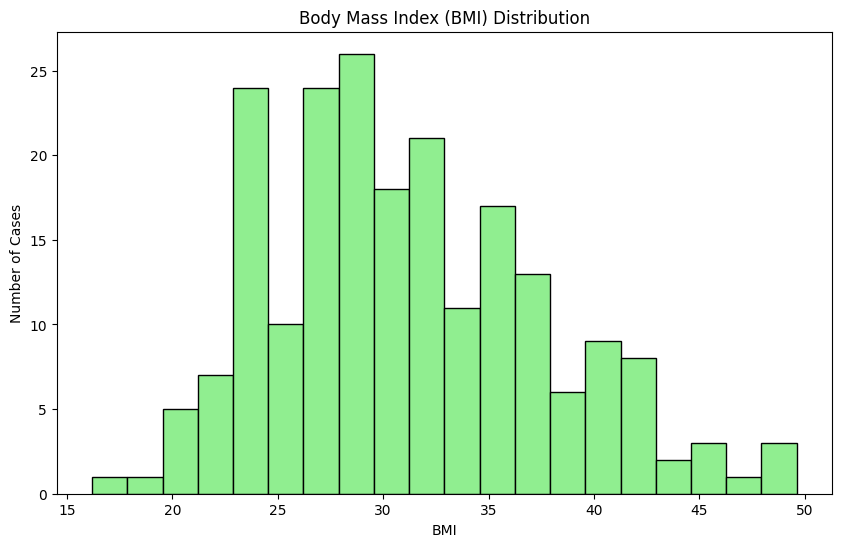

In [39]:
import json
#  讀取 JSON 檔案
with open("data/kits.json", "r") as file:
    data = json.load(file)

# 將 JSON 轉換為 DataFrame
df = pd.DataFrame(data)

# 檢查資料
print(df.head())

# 年齡分佈
plt.figure(figsize=(10, 6))
plt.hist(df['age_at_nephrectomy'], bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution at Nephrectomy")
plt.xlabel("Age")
plt.ylabel("Number of Cases")
plt.show()

# 性別分佈
plt.figure(figsize=(6, 6))
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

# 體型 (BMI) 分佈
plt.figure(figsize=(10, 6))
plt.hist(df['body_mass_index'], bins=20, color='lightgreen', edgecolor='black')
plt.title("Body Mass Index (BMI) Distribution")
plt.xlabel("BMI")
plt.ylabel("Number of Cases")
plt.show()

腫瘤分析

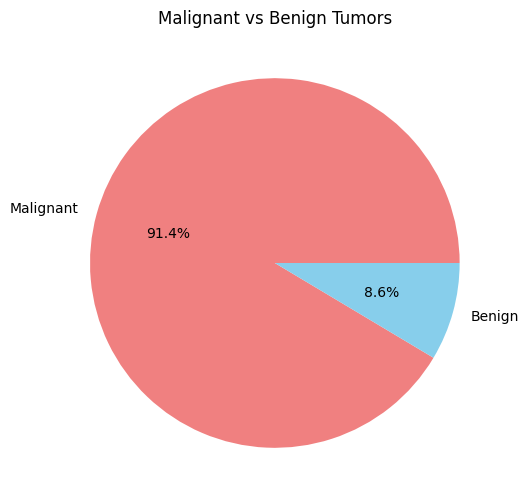

/var/folders/rc/s8hbvdh5269631mhmty72l900000gn/T/ipykernel_49165/1073851829.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='pathology_t_stage', palette="viridis", order=df['pathology_t_stage'].value_counts().index)


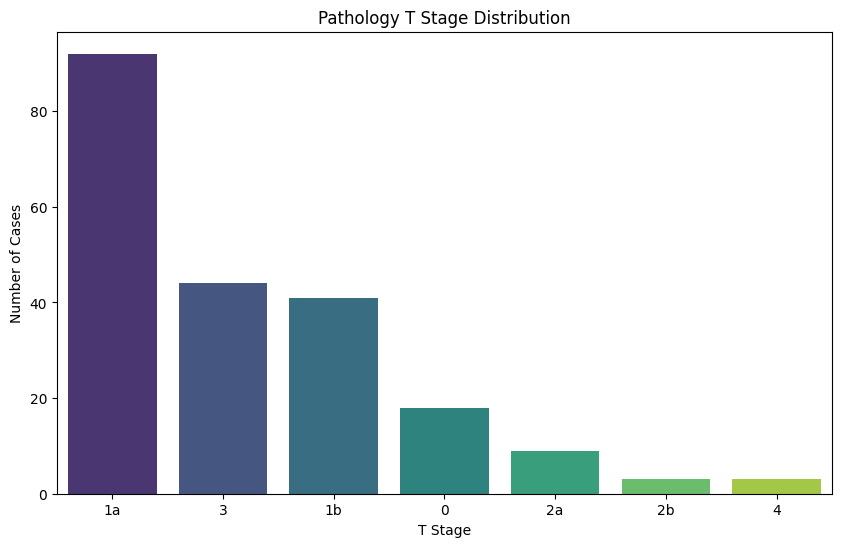

/var/folders/rc/s8hbvdh5269631mhmty72l900000gn/T/ipykernel_49165/1073851829.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='tumor_histologic_subtype', palette="Set2", order=df['tumor_histologic_subtype'].value_counts().index)


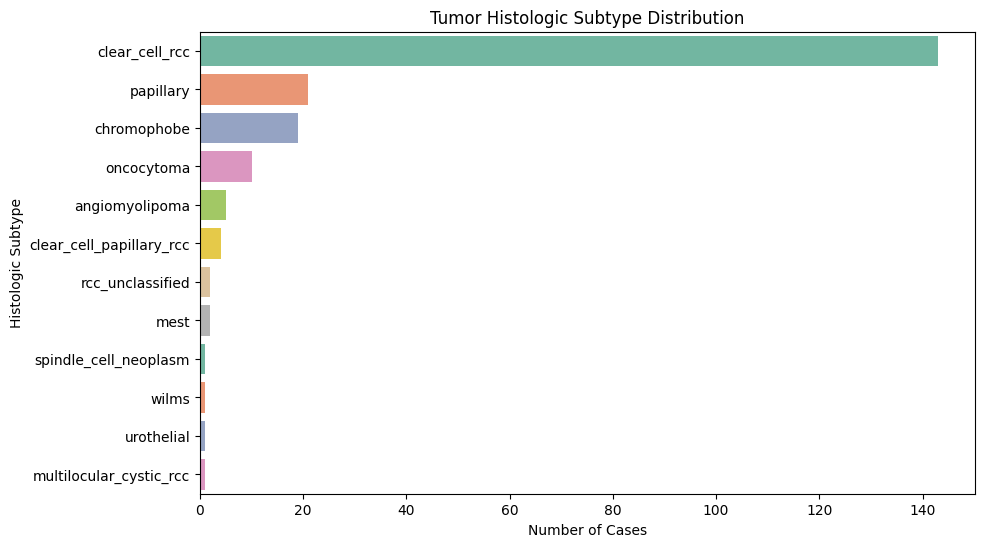

In [43]:
import seaborn as sns
# 讀取 JSON 檔案
with open("data/kits.json", "r") as file:
    data = json.load(file)

# 將 JSON 轉換為 DataFrame
df = pd.DataFrame(data)

# 確認資料格式
# print(df.head())

# 惡性腫瘤分佈
plt.figure(figsize=(6, 6))
df['malignant'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Malignant', 'Benign'], colors=['lightcoral', 'skyblue'])
plt.title("Malignant vs Benign Tumors")
plt.ylabel("")
plt.show()

# T期分佈
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='pathology_t_stage', palette="viridis", order=df['pathology_t_stage'].value_counts().index)
plt.title("Pathology T Stage Distribution")
plt.xlabel("T Stage")
plt.ylabel("Number of Cases")
plt.show()

# 腫瘤組織學亞型分佈
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='tumor_histologic_subtype', palette="Set2", order=df['tumor_histologic_subtype'].value_counts().index)
plt.title("Tumor Histologic Subtype Distribution")
plt.xlabel("Number of Cases")
plt.ylabel("Histologic Subtype")
plt.show()

ct影像分析

      case_id  x_spacing  y_spacing  z_spacing
0  case_00000   0.919922   0.919922        0.5
1  case_00001   0.798828   0.798828        0.5
2  case_00002   0.939453   0.939453        1.0
3  case_00003   0.855469   0.855469        1.0
4  case_00004   0.976562   0.976562        4.0


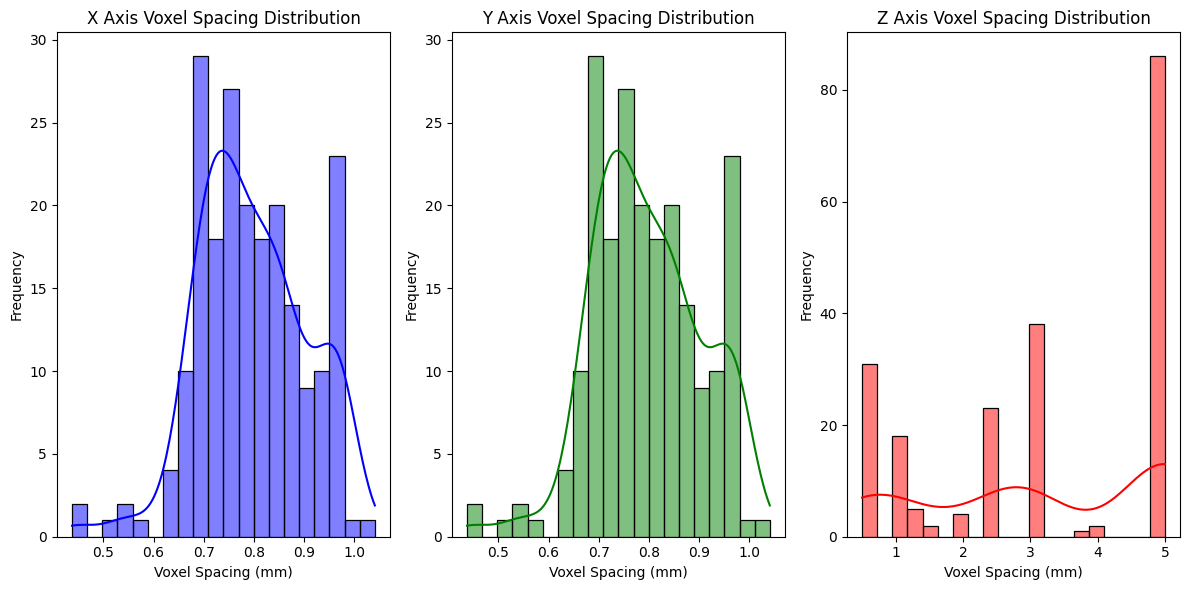

      case_id  physical_size_x  physical_size_y  physical_size_z
0  case_00000            471.0            471.0             50.0
1  case_00001            409.0            409.0             50.0
2  case_00002            481.0            481.0            100.0
3  case_00003            438.0            438.0            100.0
4  case_00004            500.0            500.0            400.0


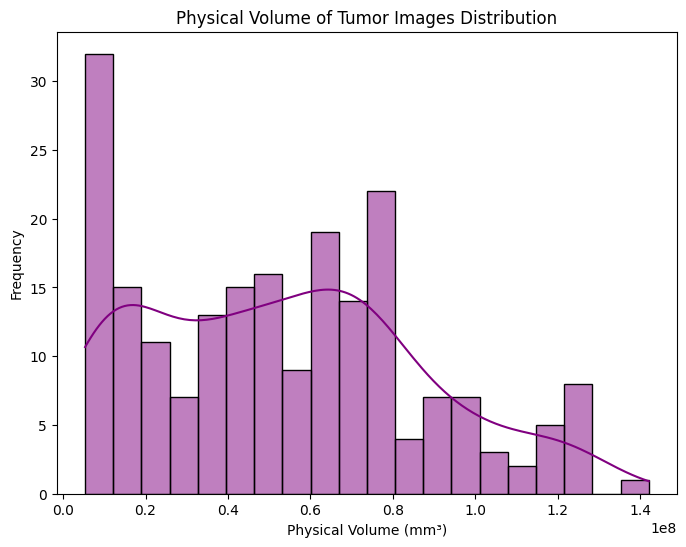

In [45]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取 JSON 檔案（這是包含所有病例的檔案）
with open("data/kits.json", "r") as file:
    data = json.load(file)

# 假設 data 是一個包含所有病例的列表，每個病例都有 voxel_spacing 等屬性
# 我們需要將它們轉換為 DataFrame

df = pd.DataFrame(data)

# 以體素間距作為關注點，將 x, y, z 方向的間距提取出來
df['x_spacing'] = df['voxel_spacing'].apply(lambda x: x['x_spacing'])
df['y_spacing'] = df['voxel_spacing'].apply(lambda x: x['y_spacing'])
df['z_spacing'] = df['voxel_spacing'].apply(lambda x: x['z_spacing'])

# 顯示處理後的資料
print(df[['case_id', 'x_spacing', 'y_spacing', 'z_spacing']].head())

# 畫出 x, y, z 軸間距的分佈
plt.figure(figsize=(12, 6))

# X軸間距分佈
plt.subplot(1, 3, 1)
sns.histplot(df['x_spacing'], bins=20, kde=True, color='blue')
plt.title("X Axis Voxel Spacing Distribution")
plt.xlabel("Voxel Spacing (mm)")
plt.ylabel("Frequency")

# Y軸間距分佈
plt.subplot(1, 3, 2)
sns.histplot(df['y_spacing'], bins=20, kde=True, color='green')
plt.title("Y Axis Voxel Spacing Distribution")
plt.xlabel("Voxel Spacing (mm)")
plt.ylabel("Frequency")

# Z軸間距分佈
plt.subplot(1, 3, 3)
sns.histplot(df['z_spacing'], bins=20, kde=True, color='red')
plt.title("Z Axis Voxel Spacing Distribution")
plt.xlabel("Voxel Spacing (mm)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# 假設影像的尺寸（在 X, Y, Z 軸的體素數量）可從其他資料中獲得，我們可以估算每個影像的物理大小
# 假設每個影像的體素數量分別為 x_size, y_size, z_size
# 這裡以假設的 x_size, y_size, z_size 為例

df['physical_size_x'] = df['x_spacing'] * 512  # 假設 x 軸的體素數量為 512
df['physical_size_y'] = df['y_spacing'] * 512  # 假設 y 軸的體素數量為 512
df['physical_size_z'] = df['z_spacing'] * 100  # 假設 z 軸的體素數量為 100

# 顯示每個病例的物理大小
print(df[['case_id', 'physical_size_x', 'physical_size_y', 'physical_size_z']].head())

# 也可以計算每個影像的體積
df['physical_volume'] = df['physical_size_x'] * df['physical_size_y'] * df['physical_size_z']

# 繪製影像體積的分佈
plt.figure(figsize=(8, 6))
sns.histplot(df['physical_volume'], bins=20, kde=True, color='purple')
plt.title("Physical Volume of Tumor Images Distribution")
plt.xlabel("Physical Volume (mm³)")
plt.ylabel("Frequency")
plt.show()

tumor size


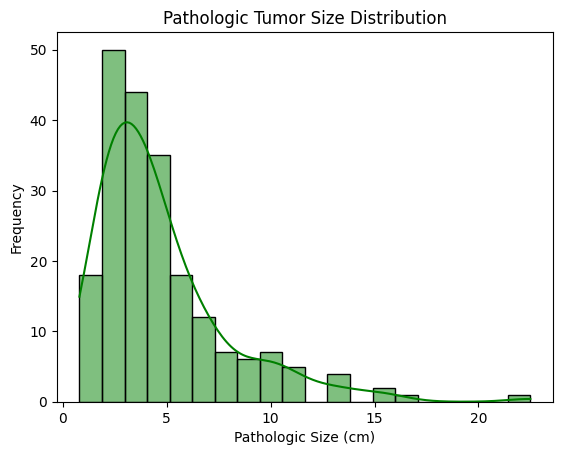

In [49]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取 JSON 檔案
with open("data/kits.json", "r") as file:
    data = json.load(file)

# 假設 data 是一個包含所有病例的列表，每個病例都有 radiographic_size 和 pathologic_size 等屬性
# 我們需要將它們轉換為 DataFrame

df = pd.DataFrame(data)

# 病理腫瘤大小分佈

sns.histplot(df['pathologic_size'], bins=20, kde=True, color='green')
plt.title("Pathologic Tumor Size Distribution")
plt.xlabel("Pathologic Size (cm)")
plt.ylabel("Frequency")
plt.show()



腫瘤分佈

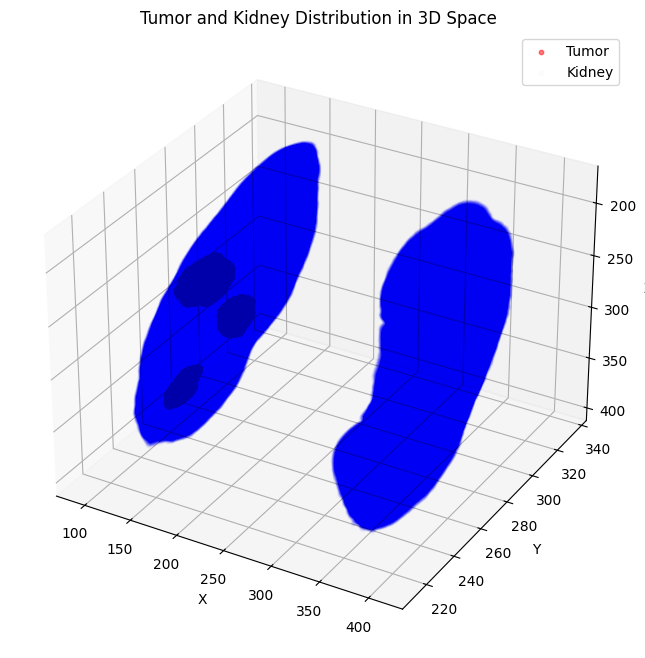

In [112]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 讀取 segmentation 資料
segmentation_path = 'data/case_00001/segmentation.nii.gz'
seg_img = nib.load(segmentation_path)
seg_data = seg_img.get_fdata()

# 假設腫瘤標註為 2，腎臟標註為 1
tumor_voxels = np.where(seg_data == 2)
kidney_voxels = np.where(seg_data == 1)

# 提取腫瘤的 X, Y, Z 位置 (順序為z,y,x)
z, y, x = tumor_voxels
k, j, i = kidney_voxels
# 畫 3D 散點圖
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 繪製腫瘤的散點，紅色
ax.scatter(x, y, z, c='r', marker='o', alpha=0.5, s=10, label="Tumor")

# 繪製腎臟的散點，藍色
ax.scatter(i, j, k, c='b', marker='o', alpha=0.01, s=10, label="Kidney")

# 設置坐標軸標籤
ax.set_xlabel('X')

ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 設置 Z 軸的顯示範圍，翻轉 Z 軸
ax.set_zlim(ax.get_zlim()[::-1])  # 這行會翻轉 Z 軸



# 設置圖標標題
ax.set_title("Tumor and Kidney Distribution in 3D Space")

# 顯示圖例
ax.legend()

# 顯示圖像
plt.show()

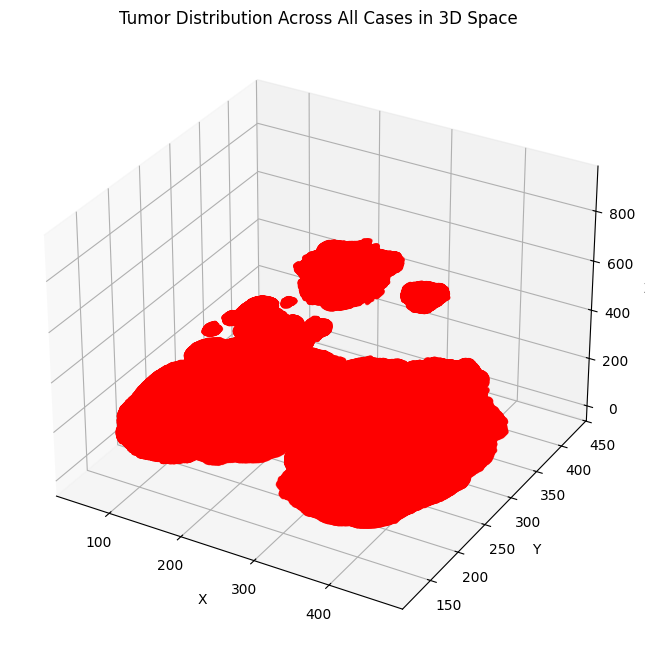

In [117]:
import nibabel as nib
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 初始化變數
data_path = "data/"
case_count = 210
tumor_positions = []

# 遍歷每個病例
for i in range(case_count):
    case_id = f"case_{i:05d}"
    case_path = os.path.join(data_path, case_id, "segmentation.nii.gz")  # 分割影像的路徑
    
    # 讀取影像
    if not os.path.exists(case_path):
        continue

    seg_img = nib.load(case_path)
    seg_data = seg_img.get_fdata()

    # 假設腫瘤標註為 2
    tumor_voxels = np.where(seg_data == 2)

    # 提取腫瘤的 X, Y, Z 位置並添加到列表中
    tumor_positions.append(tumor_voxels)

# 將所有腫瘤位置數據合併為一個大的陣列
all_tumor_positions = np.concatenate([np.array(tumor).T for tumor in tumor_positions], axis=0)

# 提取腫瘤的 X, Y, Z 坐標
z, y, x = all_tumor_positions[:, 0], all_tumor_positions[:, 1], all_tumor_positions[:, 2]

# 繪製 3D 散點圖
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 繪製腫瘤的散點圖
ax.scatter(x, y, z, c='r', marker='o', alpha=0.5, s=5)

# 設置坐標軸標籤
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 設置圖標標題
ax.set_title("Tumor Distribution Across All Cases in 3D Space")

# 顯示圖像
plt.show()

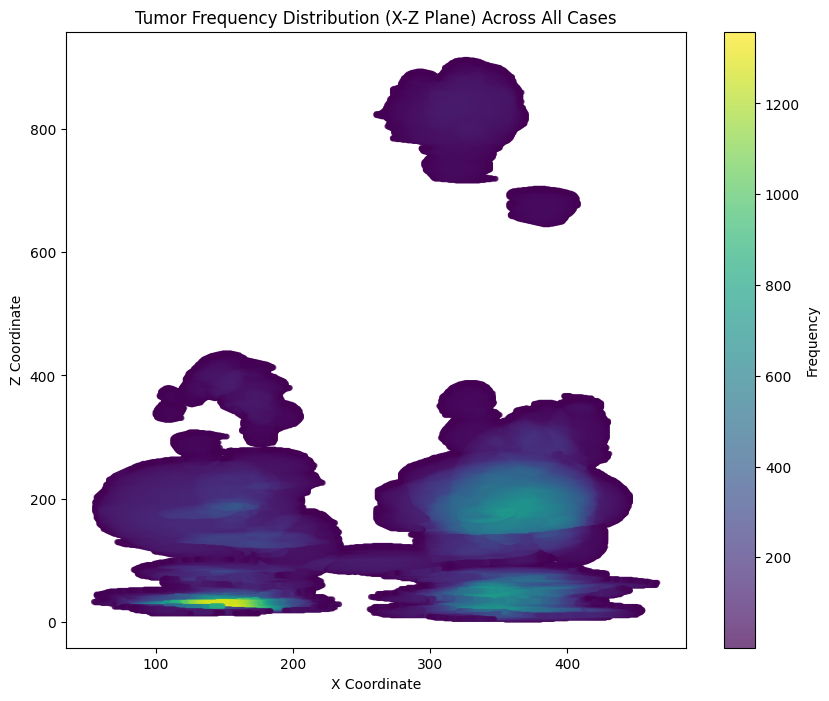

In [119]:
import nibabel as nib
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import Counter

# 初始化變數
data_path = "data/"
case_count = 210
tumor_positions = []

# 遍歷每個病例
for i in range(case_count):
    case_id = f"case_{i:05d}"
    case_path = os.path.join(data_path, case_id, "segmentation.nii.gz")  # 分割影像的路徑
    
    # 讀取影像
    if not os.path.exists(case_path):
        continue

    seg_img = nib.load(case_path)
    seg_data = seg_img.get_fdata()

    # 假設腫瘤標註為 2
    tumor_voxels = np.where(seg_data == 2)

    # 提取腫瘤的 X 和 Z 位置並添加到列表中
    z, y, x = tumor_voxels
    tumor_positions.extend(zip(x, z))  # 只存儲 X 和 Z 坐標

# 計算 X 和 Z 坐標的頻率
counter = Counter(tumor_positions)

# 提取 X 和 Z 值，以及每個組合的頻率
x_vals, z_vals = zip(*counter.keys())
frequencies = counter.values()

# 繪製散點圖，X 和 Z 軸作為坐標，頻率作為顏色
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_vals, z_vals, c=frequencies, cmap='viridis', s=10, alpha=0.7)

# 設置坐標軸標籤
plt.xlabel('X Coordinate')
plt.ylabel('Z Coordinate')

# 設置圖標標題
plt.title("Tumor Frequency Distribution (X-Z Plane) Across All Cases")

# 顯示顏色條
plt.colorbar(scatter, label='Frequency')

# 顯示圖像
plt.show()